# Advances in Machine Learning with Big Data

### Jeremy Large
#### jeremy.large@economics.ox.ac.uk

&#169; Jeremy Large (2020) ; shared under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/)

## Contents Weeks 1-4:

1. Introducing this course's dataset

1. Being an econometrician _and_ a data scientist

1. Overfit and regularization

1. Regularization through predictor/feature selection (Lasso etc.)

1. Resampling methods, and model selection

1. Decision trees, bagging, and random forests

1. Single-layer neural networks


But first: this is a `jupyter notebook` which implements `python`. So as always, we need to prepare it ... :

## Prepare our notebook for our purposes:

(i.e. "write boilerplate")

In [1]:
# make the notebook pick it up,
# if I change the functions in my libraries behind the scenes:
%load_ext autoreload
%autoreload 2

# prepare to present diagrams in this notebook:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### import some core python modules:

In [2]:
import sys, os

# ... determine how I would like the python code to **log** its progress:
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

#### ... classic python libraries that are suitable and commonly used for machine learning work:

In [3]:
import numpy as np    # fast handling of matrices of real numbers, and similar

import pandas as pd     # great tool for wielding rectangular datasets

import statsmodels    # econometrics-centric statistical package

import sklearn   # scikit-learn - machine-learning-centric statistical package

# and later:
# from tensorflow import keras ## (deploys neural nets)

#### ... now I tell the code where to look for the libraries I wrote for the course, as well as where to dump data:

In [4]:
# point at library; I need some lessons on doing good PYTHONPATHs:
REPO_DIR = os.path.dirname(os.getcwd())

UCI_LIB = os.path.join(REPO_DIR, 'lib')
UCI_DATA = os.path.join(REPO_DIR, 'data') 

sys.path.append(UCI_LIB)

In [5]:
UCI_DATA_FILE = os.path.join(UCI_DATA, 'raw.csv') 

#### ... among other things we just created a path name where we can later save a file:

In [6]:
print(UCI_DATA_FILE)

C:\Users\jerem\Documents\work\Oxford\SBS\MLBD\ox-sbs-ml-bd\data\raw.csv


when instructed to `import`, which places is this notebook going to look?

(and in which order?)

In [7]:
for a in sys.path:
    print(a)

C:\Users\jerem\anaconda3\envs\ml_bd\python36.zip
C:\Users\jerem\anaconda3\envs\ml_bd\DLLs
C:\Users\jerem\anaconda3\envs\ml_bd\lib
C:\Users\jerem\anaconda3\envs\ml_bd

C:\Users\jerem\anaconda3\envs\ml_bd\lib\site-packages
C:\Users\jerem\anaconda3\envs\ml_bd\lib\site-packages\win32
C:\Users\jerem\anaconda3\envs\ml_bd\lib\site-packages\win32\lib
C:\Users\jerem\anaconda3\envs\ml_bd\lib\site-packages\Pythonwin
C:\Users\jerem\anaconda3\envs\ml_bd\lib\site-packages\IPython\extensions
C:\Users\jerem\.ipython
C:\Users\jerem\Documents\work\Oxford\SBS\MLBD\ox-sbs-ml-bd\lib


... now that `sys.path` contains the directories to look through, I can tell the code to `import` the modules I wrote for this course:

In [8]:
from uci_retail_data import stock_codes 
# gives us: is_invalid, customer_code, stock_code_to_num, invalid_series, invoice_df

from uci_retail_data import uci_files 
# gives us load_uci_file, REMOTE_FILE, SHEET_NAME

... for example, here's one of the variables we just went and obtained:

In [9]:
uci_files.REMOTE_FILE

'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'

(https://www.uci.edu is University of California, Irvine - providers of our dataset)

## Overview of the course

### Our objectives: we want you:

* to analyse/critique our **code** with confidence, and to write your own
 
* to be conversant with important **concepts** in machine learning



* to **navigate** easily the excellent online material in this area:

     * many outstanding MOOCs (e.g. Andrew Ng, Stanford)
     
     * https://stackoverflow.com/
     
     * Docstrings and Readmes for open source libraries, e.g. https://scikit-learn.org   ,  https://keras.io/
     
     * Wikipedia
     
     * ...

* to be able to **develop yourselves** in the future, in the directions that you choose

### What we expect you to know already:

You should be **on top of masters-level econometrics**. We also expect you to have **facility with python**: for example, nothing in these should look too daunting: 
* https://www.kevinsheppard.com/teaching/python/course/
* https://www.kevinsheppard.com/teaching/python/companion-course/

Furthermore, you should have **python up-and-running** on your desktop/laptop.

* as a start, you will need [**these python libraries**](https://github.com/jeremy-large/ox-sbs-ml-bd/blob/master/binder/requirements.txt) available locally 

* if you haven't yet set up your personal python environment, you can still implement this notebook at the **MyBinder** button on my **github** page for the course: 
   * https://github.com/jeremy-large/ox-sbs-ml-bd
   * but be warned ... if you leave your MyBinder instance of our environment alone for a few minutes, the system will decommission it and you may lose work
 

### Textbooks:

While not mandatory reading, the below textbooks are valuable background.

Focus on ensuring you can **implement, adjust and understand these `jupyter notebooks`**, the text books are supplemental

   * James, Witten, Hastie, Tibshirani: *An Introduction to Statistical Learning*
   * Hastie, Tibshirani, Friedman: *The Elements of Statistical Learning*


### Assessment:

#### What will be in the assessments?

* If you can **implement, adjust and understand the `jupyter notebooks`** comprising these lectures, you will be well placed to excel in both group, and individual, assignments


### Assignments between classes:

#### There will be unassessed assignments from me each week

#### These might involve online research, or adapting the code in these notebooks


## 1. Introducing the dataset

In [10]:
print(uci_files.REMOTE_FILE)
print(uci_files.SHEET_NAME)

https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx
Year 2009-2010


In [11]:
if os.path.exists(UCI_DATA_FILE):
    df = uci_files.load_uci_file(UCI_DATA_FILE, uci_files.SHEET_NAME)
else:
    df = uci_files.load_uci_file(uci_files.REMOTE_FILE, uci_files.SHEET_NAME)
    df.to_csv(UCI_DATA_FILE)
    logging.info('Saving a copy to ' + UCI_DATA_FILE)

2020-04-28 18:39:28,210 INFO:Loading C:\Users\jerem\Documents\work\Oxford\SBS\MLBD\ox-sbs-ml-bd\data\raw.csv , sheet Year 2009-2010
2020-04-28 18:39:31,455 INFO:Loaded C:\Users\jerem\Documents\work\Oxford\SBS\MLBD\ox-sbs-ml-bd\data\raw.csv , sheet number one, obviously


In [12]:
type(df)

pandas.core.frame.DataFrame

[recorded lessons 19 and 20 here](https://www.kevinsheppard.com/teaching/python/course/)

#### Lets inspect the first few rows of this file:

In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


... and now lets look at the last couple of lines:

In [14]:
df.tail(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


OK, so that's 525,460 datapoints, each of which represents the purchase of an item in an online store. Turns out this store was in the UK.

  * ... from start of December 2009 until mid December 2010.

Another way of looking at the dataset: ( `pandas.DataFrame.info()` )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


... and a look at the numerical columns: ( `pandas.DataFrame.describe()` )

In [16]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


... half a million rows is _not that much_ these days, but will be a good illustration for this course.

### First piece of bespoke code / Cleaning data:

I spent time removing lines from the data that I found irrelevant or statistically misleading.

* This means: I wrote a function and put it in a library. 

In [17]:
# Here, I call the irrelevant lines 'invalids':
invalids = stock_codes.invalid_series(df)

Next: a refresher of basic `pandas` syntax:

In [18]:
df.loc[invalids].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia


 * **Exercise**: find the code where I define `invalids`. It is not perfect. Describe what it does, and critique it.

#### Now some code to aggregate the data to the level of: ... **one line per invoice**:

In [19]:
invoices = stock_codes.invoice_df(df, invalid_series=invalids)

In [20]:
invoices.tail()

,customer,codes_in_invoice,items_in_invoice,invoice_spend,hour,month,words,country,words_per_item
Invoice,,,,,,,,,
538167,14713.0,25,125,298.95,18,201012,"{SALLE, CHARLOTTE, DE, RED, DESIGN, KIT, CABIN...",United Kingdom,3.080000
538168,14702.0,30,167,318.70,19,201012,"{GLASS, 3, HANGING, RED, DESIGN, CASES, KIT, R...",United Kingdom,2.633333
538169,13230.0,13,33,93.45,19,201012,"{BOARD, CHRISTMAS, SMALL, SAUCER, RED, TEA, GL...",United Kingdom,3.076923
538170,13969.0,25,133,317.59,19,201012,"{BAKELIKE, 3, RED, TRAY, DESIGN, KIT, WATER, B...",United Kingdom,2.920000
538171,17530.0,65,194,300.64,20,201012,"{SHELF, FERN, TRINKET, RED, CIRCLE, ABSTRACT, ...",United Kingdom,2.200000


In [21]:
len(invoices[invoices.codes_in_invoice > 50]), len(invoices)

(2128, 20577)

* **Exercise**: what's the meaning of the line above?

Lets examine the sizes of these invoices:

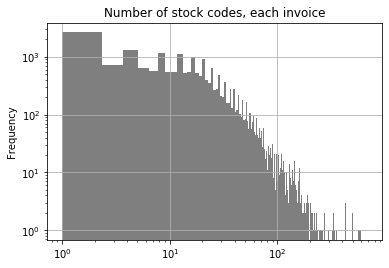

In [22]:
_ = invoices.codes_in_invoice.plot.hist(logy=True, logx=True, bins=500, 
                        title='Number of stock codes, each invoice', 
                        color='k', alpha=0.5, grid=True)


 * **Exercise**: find the code where I aggregate by invoice. Again, this is not perfect. Describe what it does, and critique it.